In [171]:
import pandas as pd
from datetime import timedelta
%pylab inline

df_goog = pd.read_csv('../../assets/datasets/goog.csv')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [172]:
df_goog['Date'] = pd.to_datetime(df_goog['Date'])
df_goog.index   = df_goog['Date']

In [173]:
df_goog.index.name = "Nick"

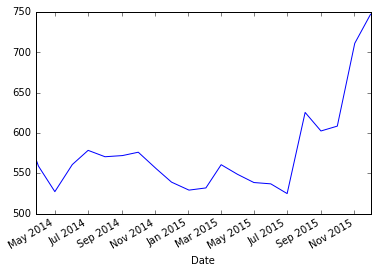

In [73]:
df_goog['Open'].plot()

In [57]:
df_goog['Date'].map(lambda value: value.day)

Date
2015-12-01     1
2015-11-02     2
2015-10-01     1
2015-09-01     1
2015-08-03     3
2015-07-01     1
2015-06-01     1
2015-05-01     1
2015-04-01     1
2015-03-02     2
2015-02-02     2
2015-01-02     2
2014-12-01     1
2014-11-03     3
2014-10-01     1
2014-09-02     2
2014-08-01     1
2014-07-01     1
2014-06-02     2
2014-05-01     1
2014-04-01     1
2014-03-27    27
Name: Date, dtype: int64

Take a high-level look at the data. Describe it. What are we looking at? Hint: We can use our `plot` function to provide a good visual.

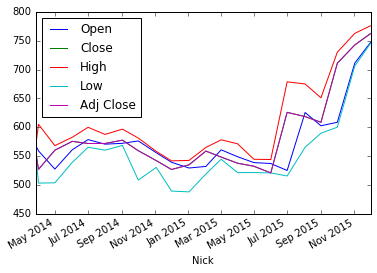

In [176]:
# df_goog.info()
# df_goog.head()
# df_goog.describe()
# df_goog.dtypes
# df_goog.plot()

df_goog[['Open','Close','High','Low','Adj Close']].plot()

Looking a little deeper, let's gauge the integrity of our data. Is there any cleaning we can do? 

In [52]:
df_goog['Open'].unique()
df_goog['High'].unique()
df_goog['Low'].unique()
df_goog['Close'].unique()
df_goog['Volume'].unique()
df_goog['Adj Close'].unique()
df_goog['Date'].unique()

array(['2015-12-01', '2015-11-02', '2015-10-01', '2015-09-01',
       '2015-08-03', '2015-07-01', '2015-06-01', '2015-05-01',
       '2015-04-01', '2015-03-02', '2015-02-02', '2015-01-02',
       '2014-12-01', '2014-11-03', '2014-10-01', '2014-09-02',
       '2014-08-01', '2014-07-01', '2014-06-02', '2014-05-01',
       '2014-04-01', '2014-03-27'], dtype=object)

Let's examine the Date column. We should probably make it the index for our DataFrame, as we need to order the data by time. Doing this will result in 6 Series objects indexed by DateTime- literal Time Series!

In [12]:
df_goog.Date
type(df_goog.Date.loc[0])

str

We need to convert the string to a DateTime object. Pandas has a built in function for this!  We should also ensure that the dates are sorted.

In [4]:
df_goog.sort_values('Date', inplace=True)    # This is a good idea to sort our values so the indexes ultimately line up
df_goog.set_index('Date', inplace=True)      # also df_goog.index = df_goog['Date'] works well here
df_goog.index = df_goog.index.to_datetime()  # Convert to datetime

In [16]:
df_goog.index = df_goog['Date']
df_goog.index = df_goog.index.to_datetime()
df_goog.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2015-12-01,2015-12-01,747.109985,775.955017,745.630005,762.369995,2519600,762.369995
2015-11-02,2015-11-02,711.059998,762.708008,705.849976,742.599976,1795300,742.599976
2015-10-01,2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998
2015-09-01,2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983
2015-08-03,2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000


In [17]:
df_goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2015-12-01 to 2014-03-27
Data columns (total 7 columns):
Date         22 non-null object
Open         22 non-null float64
High         22 non-null float64
Low          22 non-null float64
Close        22 non-null float64
Volume       22 non-null int64
Adj Close    22 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.4+ KB


Let's add some more columns with useful data extracted from the DateTime index.

In [18]:
df_goog['Year']   =  df_goog.index.year
df_goog['Month']  =  df_goog.index.month
df_goog['Day']    =  df_goog.index.day

In [20]:
df_goog.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
Date,,,,,,,,,,
2015-12-01,2015-12-01,747.109985,775.955017,745.630005,762.369995,2519600,762.369995,2015,12,1
2015-11-02,2015-11-02,711.059998,762.708008,705.849976,742.599976,1795300,742.599976,2015,11,2
2015-10-01,2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,2015,10,1
2015-09-01,2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,2015,9,1
2015-08-03,2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,2015,8,3


Let's walk through adding a dummy variable to flag days where the Close price was higher than the Open price

In [21]:
#Insructor Note: Walk through creating the dummy variable. 
# Two possible solutions:
df_goog['Closed_Higher'] = df_goog.Open > df_goog.Close
#OR
df_goog['Closed_Higher'] = pd.get_dummies(df_goog.Open > df_goog.Close).values

We can use the DateTime object to access various different cuts of data using date attributes. For example, if we wanted to get all of the cuts from 2015, we would do as such:

In [22]:
df_goog['2015']

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day,Closed_Higher
Date,,,,,,,,,,,
2015-12-01,2015-12-01,747.109985,775.955017,745.630005,762.369995,2519600,762.369995,2015,12,1,1.0
2015-11-02,2015-11-02,711.059998,762.708008,705.849976,742.599976,1795300,742.599976,2015,11,2,1.0
2015-10-01,2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,2015,10,1,1.0
2015-09-01,2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,2015,9,1,1.0
2015-08-03,2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,2015,8,3,0.0
2015-07-01,2015-07-01,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,2015,7,1,1.0
2015-06-01,2015-06-01,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,2015,6,1,0.0
2015-05-01,2015-05-01,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,2015,5,1,0.0
2015-04-01,2015-04-01,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,2015,4,1,0.0


Let's recall the TimeDelta object. We can use this to shift our entire index by a given offset.

In [25]:
df_goog.index + timedelta(days=1)

DatetimeIndex(['2015-12-02', '2015-11-03', '2015-10-02', '2015-09-02',
               '2015-08-04', '2015-07-02', '2015-06-02', '2015-05-02',
               '2015-04-02', '2015-03-03', '2015-02-03', '2015-01-03',
               '2014-12-02', '2014-11-04', '2014-10-02', '2014-09-03',
               '2014-08-02', '2014-07-02', '2014-06-03', '2014-05-02',
               '2014-04-02', '2014-03-28'],
              dtype='datetime64[ns]', name=u'Date', freq=None)

On your own, try to shift the entire time series **both** forwards and backwards by the following intervals:
- 1 hour
- 3 days
- 12 years, 1 hour, and 43 seconds

In [27]:
print "+1 hour \n", df_goog.index + timedelta(hours=1)
print "-1 hour \n",df_goog.index - timedelta(hours=1)

print "+3 days \n", df_goog.index + timedelta(days=3)
print "-3 days \n", df_goog.index - timedelta(days=3)

print "+12 years \n", df_goog.index + timedelta(days=4380, hours=1, seconds=43)
print "-12 years \n", df_goog.index - timedelta(days=4380, hours=1, seconds=43)

+1 hour 
DatetimeIndex(['2015-12-01 01:00:00', '2015-11-02 01:00:00',
               '2015-10-01 01:00:00', '2015-09-01 01:00:00',
               '2015-08-03 01:00:00', '2015-07-01 01:00:00',
               '2015-06-01 01:00:00', '2015-05-01 01:00:00',
               '2015-04-01 01:00:00', '2015-03-02 01:00:00',
               '2015-02-02 01:00:00', '2015-01-02 01:00:00',
               '2014-12-01 01:00:00', '2014-11-03 01:00:00',
               '2014-10-01 01:00:00', '2014-09-02 01:00:00',
               '2014-08-01 01:00:00', '2014-07-01 01:00:00',
               '2014-06-02 01:00:00', '2014-05-01 01:00:00',
               '2014-04-01 01:00:00', '2014-03-27 01:00:00'],
              dtype='datetime64[ns]', name=u'Date', freq=None)
-1 hour 
DatetimeIndex(['2015-11-30 23:00:00', '2015-11-01 23:00:00',
               '2015-09-30 23:00:00', '2015-08-31 23:00:00',
               '2015-08-02 23:00:00', '2015-06-30 23:00:00',
               '2015-05-31 23:00:00', '2015-04-30 23:00:00',
   

## Discussion: Date ranges and Frequencies

In [40]:
df_goog.head(22)

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day,Closed_Higher
Date,,,,,,,,,,,
2015-12-01,2015-12-01,747.109985,775.955017,745.630005,762.369995,2519600,762.369995,2015,12,1,1.0
2015-11-02,2015-11-02,711.059998,762.708008,705.849976,742.599976,1795300,742.599976,2015,11,2,1.0
2015-10-01,2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,2015,10,1,1.0
2015-09-01,2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,2015,9,1,1.0
2015-08-03,2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,2015,8,3,0.0
2015-07-01,2015-07-01,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,2015,7,1,1.0
2015-06-01,2015-06-01,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,2015,6,1,0.0
2015-05-01,2015-05-01,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,2015,5,1,0.0
2015-04-01,2015-04-01,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,2015,4,1,0.0


/Users/davidyerrington/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


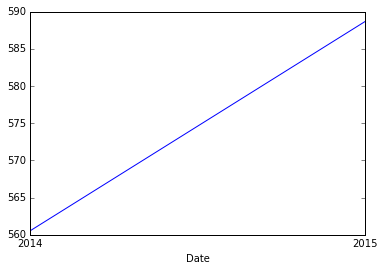

In [170]:
df_goog.Open.resample('a').plot()
# df_goog.Open.asfreq('M', method='backfill').plot()

Note that `asfreq` gives us a `method` keyword argument. Backfill, or bfill, will propogate the last valid observation forward. In other words, it will use the value preceding a range of unknown indices to fill in the unknowns. Inversely, pad, or ffill, will use the first value succeeding a range of unknown indices to fill in the unknowns.

Now, let's discuss the following points:
- What does `asfreq` do?
- What does `resample` do?
- What is the difference?
- When would we want to use each?

We can also create our own date ranges using a built in function, `date_range`. The `periods` and `freq` keyword arguments grant the user finegrained control over the resulting values. To reset the time data, use the `normalize=True` directive.

**NOTE:** See Reference B in the lesson notes for all of the available offset aliases

In [87]:
index = pd.date_range('3/1/2016', '6/1/2016')

pd.date_range(start='3/1/2016', periods=20)
pd.date_range(end='6/1/2016', periods=20)
pd.date_range('1/1/2016', '12/1/2016', freq='BM')

pd.date_range('3/7/2016 12:56:31', periods=6)
pd.date_range('3/7/2012 12:56:31', periods=6, normalize=True)

DatetimeIndex(['2012-03-07', '2012-03-08', '2012-03-09', '2012-03-10',
               '2012-03-11', '2012-03-12'],
              dtype='datetime64[ns]', freq='D')

We are also given a Period object, which can be used to represent a time interval. The Period object consists of a start time and an end time, and can be created by providing a start time and a given frequency.

In [168]:
test_period = pd.Period('2014-01', freq='M')

print test_period.start_time
print test_period.end_time


start_mask =  df_goog.index >= test_period.start_time
end_mask   =  df_goog.index <= test_period.end_time

df_goog[(start_mask) & (end_mask)]


2014-01-01 00:00:00
2014-03-31 23:59:59.999999999


,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2014-03-27,2014-03-27,568.002563,568.002563,552.922546,556.972473,25300,556.972473


In [186]:
start_mask =  df_goog.index >= pd.to_datetime('2014-07-01')
end_mask   =  df_goog.index <= pd.to_datetime('2014-12-01')

# start_mask

df_goog[(start_mask) & (end_mask)]


,Date,Open,High,Low,Close,Volume,Adj Close
Nick,,,,,,,
2014-12-01,2014-12-01,538.902466,541.412415,489.002228,526.402405,2146700,526.402405
2014-11-03,2014-11-03,555.502502,557.902527,530.082397,541.832458,1561200,541.832458
2014-10-01,2014-10-01,576.012634,581.002625,508.102295,559.082520,2356400,559.082520
2014-09-02,2014-09-02,571.852539,596.482666,568.212646,577.362610,1673200,577.362610
2014-08-01,2014-08-01,570.402588,587.342651,560.002563,571.602539,1368800,571.602539
2014-07-01,2014-07-01,578.322632,599.652710,565.012573,571.602539,1668800,571.602539


In [146]:
df_goog.index.min(), df_goog.index.max()

(Timestamp('2014-03-27 00:00:00'), Timestamp('2015-12-01 00:00:00'))

In [183]:
df_goog.resample("M").sum()

,Open,High,Low,Close,Volume,Adj Close
Nick,,,,,,
2014-03-31,568.002563,568.002563,552.922546,556.972473,25300,556.972473
2014-04-30,558.712585,604.832764,502.802277,526.662415,3290800,526.662415
2014-05-31,527.112366,567.842590,503.302277,559.892578,1828500,559.892578
2014-06-30,560.702576,582.452637,538.752441,575.282593,1872200,575.282593
2014-07-31,578.322632,599.652710,565.012573,571.602539,1668800,571.602539
2014-08-31,570.402588,587.342651,560.002563,571.602539,1368800,571.602539
2014-09-30,571.852539,596.482666,568.212646,577.362610,1673200,577.362610
2014-10-31,576.012634,581.002625,508.102295,559.082520,2356400,559.082520
2014-11-30,555.502502,557.902527,530.082397,541.832458,1561200,541.832458


Each of these objects can be used to alter and access data from our DataFrames. We'll try those out in our Independent Practice in a moment.